<a href="https://colab.research.google.com/github/ShreyJais/RL/blob/main/2348558_RL_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Develop a program to perform policy evaluation and improvement for a given MDP

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
grid = np.array([
    [0, 0, 0, 1],
    [0, 3, 0, 2],
    [0, 0, 0, 0]
])
"""
0: Represents an empty cell.
1: Represents a terminal state with a positive reward (goal).
2: Represents a terminal state with a negative reward (penalty).
3: Represents a wall or obstacle (the agent cannot move here).
"""
rewards = {0: -0.04, 1: 1, 2: -1, 3: 0}  # Define rewards for each type
discount_factor = 0.9
tolerance = 1e-4

actions = ['⬆️', '⬇️', '⬅️', '➡️']
action_effects = {
    '⬆️': (-1, 0),
    '⬇️': (1, 0),
    '⬅️': (0, -1),
    '➡️': (0, 1)
}

In [18]:
def check(row, col, action):
    dr, dc = action_effects[action]
    new_row, new_col = row + dr, col + dc
    if new_row < 0 or new_row >= grid.shape[0] or new_col < 0 or new_col >= grid.shape[1]:
        return row, col
    if grid[new_row, new_col] == 3:
        return row, col
    return new_row, new_col

In [19]:
def policy_evaluation(policy, value_grid):
    while True:
        delta = 0
        new_value_grid = value_grid.copy()

        for row in range(grid.shape[0]):
            for col in range(grid.shape[1]):
                cell_type = grid[row, col]

                if cell_type in [1, 2, 3]:
                    new_value_grid[row, col] = rewards[cell_type]
                    continue

                action = policy[row, col]
                next_row, next_col = check(row, col, action)
                reward = rewards[grid[next_row, next_col]]
                new_value_grid[row, col] = reward + discount_factor * value_grid[next_row, next_col]

                delta = max(delta, abs(new_value_grid[row, col] - value_grid[row, col]))

        value_grid = new_value_grid
        if delta < tolerance:
            break
    return value_grid

In [20]:
def policy_improvement(policy, value_grid):
    policy_stable = True
    new_policy = np.full_like(grid, None, dtype=object)

    for row in range(grid.shape[0]):
        for col in range(grid.shape[1]):
            cell_type = grid[row, col]

            if cell_type in [1, 2, 3]:
                continue

            action_values = {}
            for action in actions:
                next_row, next_col = check(row, col, action)
                reward = rewards[grid[next_row, next_col]]
                action_value = reward + discount_factor * value_grid[next_row, next_col]
                action_values[action] = action_value

            best_action = max(action_values, key=action_values.get)
            new_policy[row, col] = best_action

            if best_action != policy[row, col]:
                policy_stable = False

    return new_policy, policy_stable

In [23]:
def policy_iteration():
    policy = np.full_like(grid, '⬆️', dtype=object)
    value_grid = np.zeros_like(grid, dtype=float)
    iterations = []
    values_over_iterations = []

    iteration = 0
    while True:
        value_grid = policy_evaluation(policy, value_grid)
        policy, policy_stable = policy_improvement(policy, value_grid)

        iterations.append(iteration)
        values_over_iterations.append(value_grid.copy())

        print(f"Iteration {iteration}:\n{value_grid}\n")
        iteration += 1

        if policy_stable:
            break

    print("Optimal Value Function (Policy Iteration):")
    print(value_grid)
    print("\nOptimal Policy (Policy Iteration):")
    print(policy)
    return values_over_iterations, iterations

In [24]:
values_over_iterations, iterations = policy_iteration()

Iteration 0:
[[-0.39911259 -0.39911259 -0.39911259  1.        ]
 [-0.39911259  0.         -0.39911259 -1.        ]
 [-0.39911259 -0.39911259 -0.39911259 -1.9       ]]

Iteration 1:
[[-0.39947599 -0.39947599  1.9         1.        ]
 [-0.39947599  0.          1.67       -1.        ]
 [-0.39947599 -0.39947599  1.463       1.2767    ]]

Iteration 2:
[[-0.39957555  1.67        1.9         1.        ]
 [-0.39957555  0.          1.67       -1.        ]
 [-0.39957555  1.2767      1.463       1.2767    ]]

Iteration 3:
[[ 1.463    1.67     1.9      1.     ]
 [ 1.2767   0.       1.67    -1.     ]
 [ 1.10903  1.2767   1.463    1.2767 ]]

Iteration 4:
[[ 1.463    1.67     1.9      1.     ]
 [ 1.2767   0.       1.67    -1.     ]
 [ 1.10903  1.2767   1.463    1.2767 ]]

Optimal Value Function (Policy Iteration):
[[ 1.463    1.67     1.9      1.     ]
 [ 1.2767   0.       1.67    -1.     ]
 [ 1.10903  1.2767   1.463    1.2767 ]]

Optimal Policy (Policy Iteration):
[['➡️' '➡️' '➡️' None]
 ['⬆️' None 

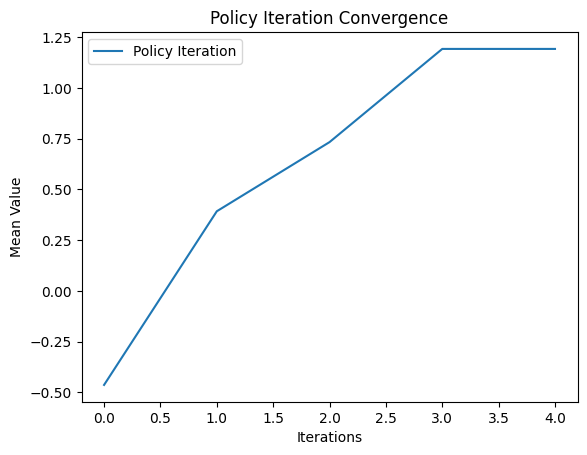

In [15]:
mean_values = [np.mean(v[v != 0]) for v in values_over_iterations]
plt.plot(iterations, mean_values, label="Policy Iteration")
plt.xlabel("Iterations")
plt.ylabel("Mean Value")
plt.title("Policy Iteration Convergence")
plt.legend()
plt.show()